### Sub-problem 2:
    * Perform classification analysis on the suicide data.
    * For this we will be using the dataset taken from kaggle :  https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016.
    * We will perform this analysis only on the countries selected from the sub-problem 1.

"This compiled dataset is aggregated from four distinct datasets connected by time and location. It was constructed with the aim of identifying patterns associated with higher suicide rates across various global cohorts, spanning different socio-economic strata."

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scikitplot as skplt

In [2]:
suicide_data = pd.read_csv("./Datasets/master.csv")

suicide_data.columns = ['country', 'year', 'sex', 'age', 'suicide_no', 'population', 
                        'suicides/100k pop', 'country-year', 'HDI/year', 'GDP/year', 'gdppercapita', 'generation']

suicide_data.head()

,country,year,sex,age,suicide_no,population,suicides/100k pop,country-year,HDI/year,GDP/year,gdppercapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
suicide_data['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [4]:
suicide_data["country"].value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [5]:
#fixing and cleaning the original data  
suicide_data['GDP/year'] = suicide_data.apply(lambda x: float(x['GDP/year'].replace(',', '')), axis=1)
suicide_data.sex.astype('category')

0          male
1          male
2        female
3          male
4          male
          ...  
27815    female
27816    female
27817      male
27818    female
27819    female
Name: sex, Length: 27820, dtype: category
Categories (2, object): ['female', 'male']

In [6]:
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicide_no         27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI/year           8364 non-null   float64
 9   GDP/year           27820 non-null  float64
 10  gdppercapita       27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


 Importing the suicide data set with extra features added from WDI database

In [7]:
extra_data = pd.read_csv("./Datasets/suicidedataextrafestures.csv")

extra_data.columns = [
    'country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'yearlyHDI',
    'GDPpyear', 'GDPpcapita', 'generation', 'suicide%', 'Internetusers', 'Expenses', 'employeecompensation',
    'Unemployment', 'Physiciansp1000', 'Legalrights', 'Laborforcetotal', 'Lifeexpectancy', 'Mobilesubscriptionsp100',
    'Refugees', 'Selfemployed', 'electricityacess', 'secondarycompletion']

In [8]:
extra_data.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physiciansp1000,Legalrights,Laborforcetotal,Lifeexpectancy,Mobilesubscriptionsp100,Refugees,Selfemployed,electricityacess,secondarycompletion
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
suicide_data["country"].nunique()

101

So there are about a 100 countries listed in our dataset. We have previously selected 64 countries for further analysis. which are:
    
'australia',
 'austria',
 'azerbaijan',
 'belarus',
 'belgium',
 'bolivia (plurinational state of)',
 'brunei darussalam',
 'bulgaria',
 'canada',
 'croatia',
 'cuba',
 'czechia',
 'denmark',
 'egypt',
 'estonia',
 'fiji',
 'finland',
 'france',
 'germany',
 'ghana',
 'guatemala',
 'guinea-bissau',
 'guyana',
 'honduras',
 'hungary',
 'iceland',
 'indonesia',
 'jordan',
 'kenya',
 'lithuania',
 'luxembourg',
 'madagascar',
 'malawi',
 'maldives',
 'mali',
 'mauritania',
 'mexico',
 'new zealand',
 'nicaragua',
 'niger',
 'norway',
 'oman',
 'pakistan',
 'philippines',
 'poland',
 'republic of moldova',
 'russian federation',
 'sao tome and principe',
 'saudi arabia',
 'serbia',
 'slovakia',
 'slovenia',
 'somalia',
 'south sudan',
 'suriname',
 'sweden',
 'switzerland',
 'syrian arab republic',
 'tajikistan',
 'tonga',
 'trinidad and tobago',
 'ukraine',
 'united states of america',
 'uruguay'

In this dataset, we are given data from year 1985-2016. however, we have been analying the data for year 2000-2016. so we will do the same here also.

Let's reduce the dataset according to our constraints.

In [10]:
countrynames = [
    'Argentina',
    'Armenia',
    'Australia',
    'Austria',
    'Belgium',
    'Brazil',
    'Bulgaria',
    'Canada',
    'Chile',
    'Colombia',
    'Croatia',
    'Cuba',
    'Czech Republic',
    'Denmark',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russian Federation',
    'South Africa',
    'Spain',
    'Sweden',
    'Switzerland',
    'Thailand', 
    'Turkmenistan',
    'Ukraine',
    'United Kingdom', 
    'United States']

In [11]:
df1 = extra_data.copy()
df = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    df = df.append(df1.iloc[np.where(df1.country == x)])

df = df[df.year >= 2000]
df = df[df.year <= 2016]

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_12972\2454602877.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.iloc[np.where(df1.country == x)])
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_12972\2454602877.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.iloc[np.where(df1.country == x)])
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_12972\2454602877.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.iloc[np.where(df1.country == x)])
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_12972\2454602877.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.iloc[n

In [12]:
df.country.value_counts()

Croatia               202
Czech Republic        202
Iceland               202
Austria               202
Hungary               202
Sweden                202
Netherlands           202
Romania               202
Japan                 192
Mexico                192
Norway                192
Poland                192
Argentina             192
Israel                192
Russian Federation    192
South Africa          192
Spain                 192
Switzerland           192
Turkmenistan          192
United Kingdom        192
Italy                 192
United States         192
Colombia              192
Brazil                192
Germany               192
Finland               192
Denmark               192
Belgium               192
Cuba                  192
Greece                192
Chile                 192
Thailand              190
Australia             180
Ukraine               180
Ireland               180
Bulgaria              180
France                180
Armenia               178
Canada      

In [13]:
df.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physiciansp1000,Legalrights,Laborforcetotal,Lifeexpectancy,Mobilesubscriptionsp100,Refugees,Selfemployed,electricityacess,secondarycompletion
180,Argentina,2000,male,75+ years,232,525161,44.18,Argentina2000,0.762,2.842040e+11,...,15.0,NaN,NaN,16446835,73.576,17.596451,609.0,1.154,NaN,85.19104
181,Argentina,2000,male,55-74 years,602,2333377,25.80,Argentina2000,0.762,2.842040e+11,...,15.0,NaN,NaN,16446835,73.576,17.596451,609.0,1.154,NaN,85.19104
182,Argentina,2000,male,35-54 years,578,4096814,14.11,Argentina2000,0.762,2.842040e+11,...,15.0,NaN,NaN,16446835,73.576,17.596451,609.0,1.154,NaN,85.19104
183,Argentina,2000,male,15-24 years,463,3306109,14.00,Argentina2000,0.762,2.842040e+11,...,15.0,NaN,NaN,16446835,73.576,17.596451,609.0,1.154,NaN,85.19104
184,Argentina,2000,male,25-34 years,331,2602314,12.72,Argentina2000,0.762,2.842040e+11,...,15.0,NaN,NaN,16446835,73.576,17.596451,609.0,1.154,NaN,85.19104


In [14]:
df.shape

(7780, 26)

### Exploratory Data Analysis

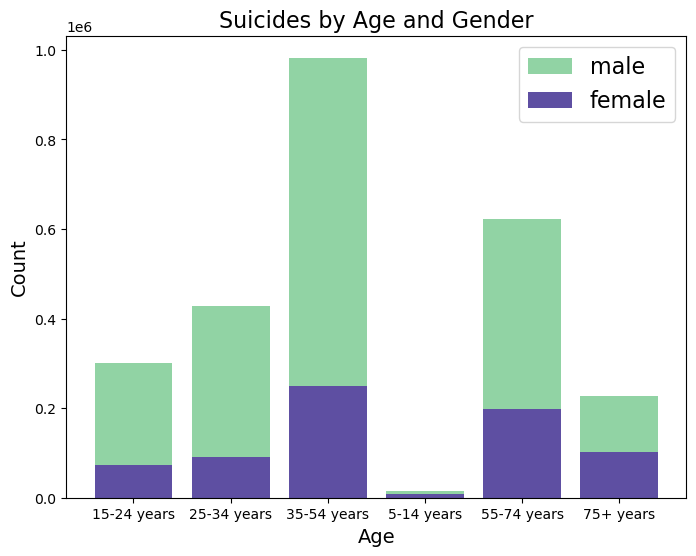

In [15]:
### Suicide count vs gender

# Generate a color map
col = plt.cm.Spectral(np.linspace(0, 1, 20))

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Group data for females and males by age and sum up suicides
agedistf = df[df['sex'] == 'female'].groupby('age')['suicides_no'].sum()
agedistm = df[df['sex'] == 'male'].groupby('age')['suicides_no'].sum()

# Plot the data using bar plots
plt.bar(agedistm.index, agedistm.values, color=col[14], label='male')
plt.bar(agedistf.index, agedistf.values, color=col[19], label='female')

# Set labels and title
plt.legend(fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Suicides by Age and Gender', fontsize=16)

# Show the plot
plt.show()

#### Insights:
    * Male suicide rates are higher than female suicide rates, irrespective of the age group.
    * for 35-54 years age group, males have the highest suicide rate.
    * for 35-54 and 55-74 age groups, females have comparitively high suicide rates.
    
#### Conclusion:
    * Age is a important factor for suicide rate.

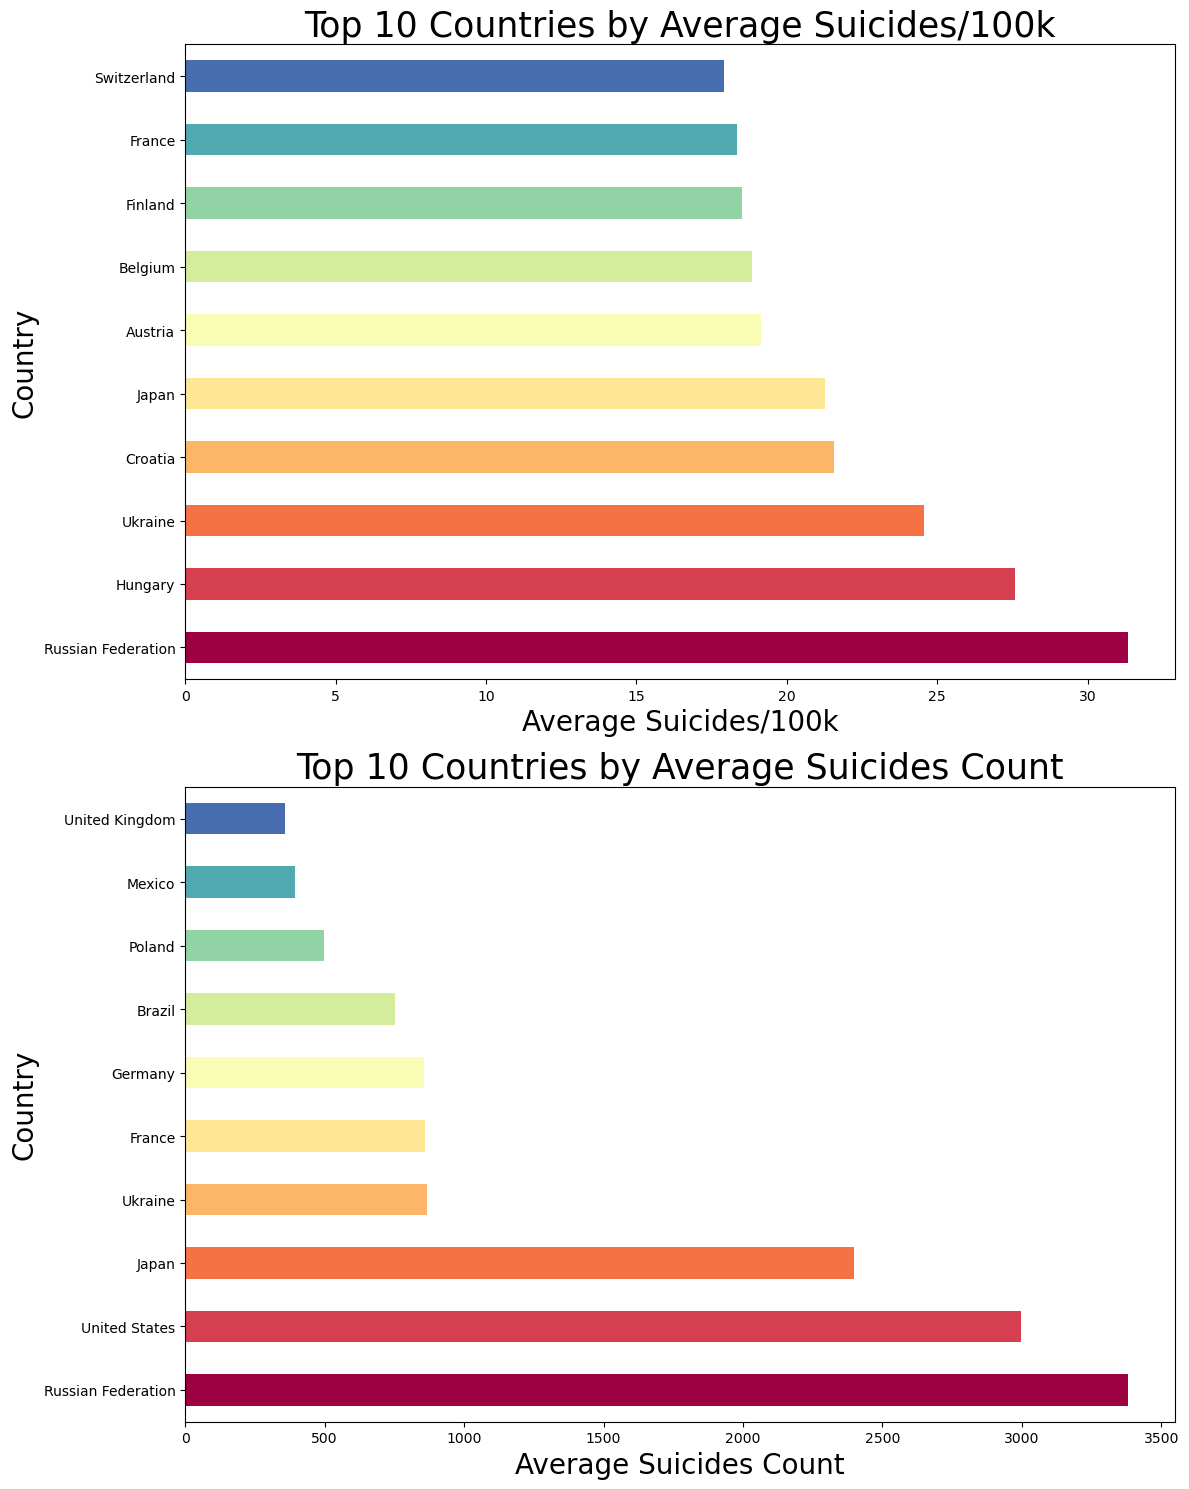

In [16]:
plt.figure(figsize=(12, 15))

col = plt.cm.Spectral(np.linspace(0, 2, 20))
# First subplot
plt.subplot(211)
df.groupby(['country'])['suicidesper100k'].mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides/100k', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 Countries by Average Suicides/100k', fontsize=25)

# Second subplot
plt.subplot(212)
df.groupby(['country'])['suicides_no'].mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides Count', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 Countries by Average Suicides Count', fontsize=25)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Insights: 
    * Russian federation topped the tally for suicide rates, closely followed by ukraine

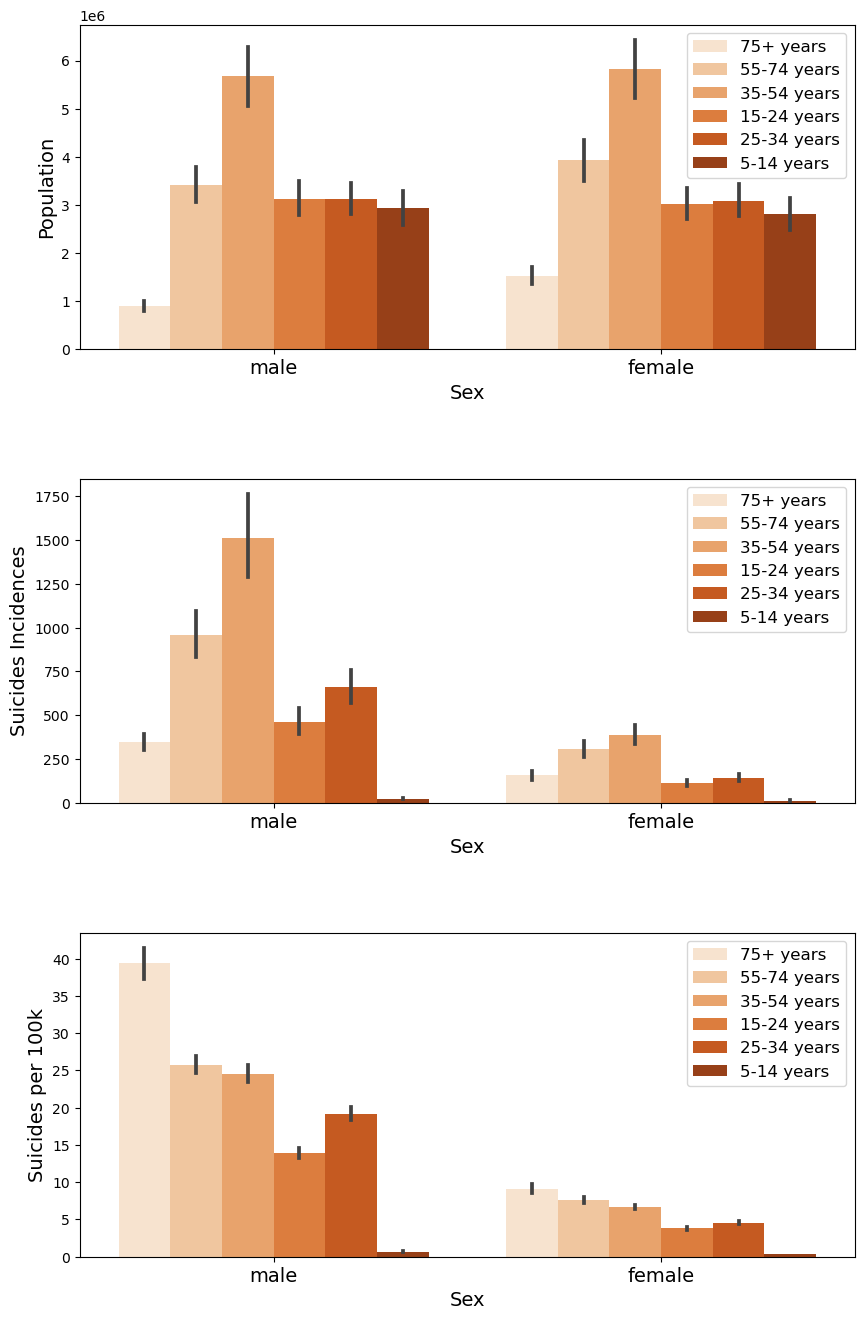

In [17]:

plt.figure(figsize=(10, 16))

# Create a grid of subplots
grid = plt.GridSpec(3, 1, hspace=0.4)

# First subplot
ax1 = plt.subplot(grid[0, 0])
sns.barplot(x='sex', y='population', hue='age', data=df, palette='Oranges', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=14)
ax1.set_ylabel('Population', fontsize=14)
ax1.set_xlabel('Sex', fontsize=14)
ax1.legend(fontsize=12, loc='best')

# Second subplot
ax2 = plt.subplot(grid[1, 0])
sns.barplot(x='sex', y='suicides_no', hue='age', data=df, palette='Oranges', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=14)
ax2.set_ylabel('Suicides Incidences', fontsize=14)
ax2.set_xlabel('Sex', fontsize=14)
ax2.legend(fontsize=12)

# Third subplot
ax3 = plt.subplot(grid[2, 0])
sns.barplot(x='sex', y='suicidesper100k', hue='age', data=df, palette='Oranges', ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=14)
ax3.set_ylabel('Suicides per 100k', fontsize=14)
ax3.set_xlabel('Sex', fontsize=14)
ax3.legend(fontsize=12)



# Show the plot
plt.show()


#### Insights:
    * Males are more likely to commit suicide that women.

Text(0, 0.5, 'Total number of suicides in the world')

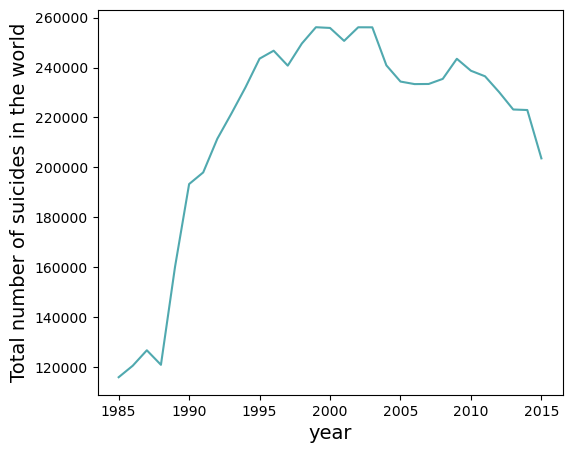

In [18]:
year = suicide_data.groupby('year').year.unique()

plt.figure(figsize=(6, 5))

totalpyear = pd.DataFrame(suicide_data.groupby('year').suicide_no.sum())

plt.plot(year.index[0:31], totalpyear[0:31], color=col[8])
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)

#### Insights:
    * The suicide rates across the world has increased from 1985-2010. But has been decresing since then.

Text(0, 0.5, 'count')

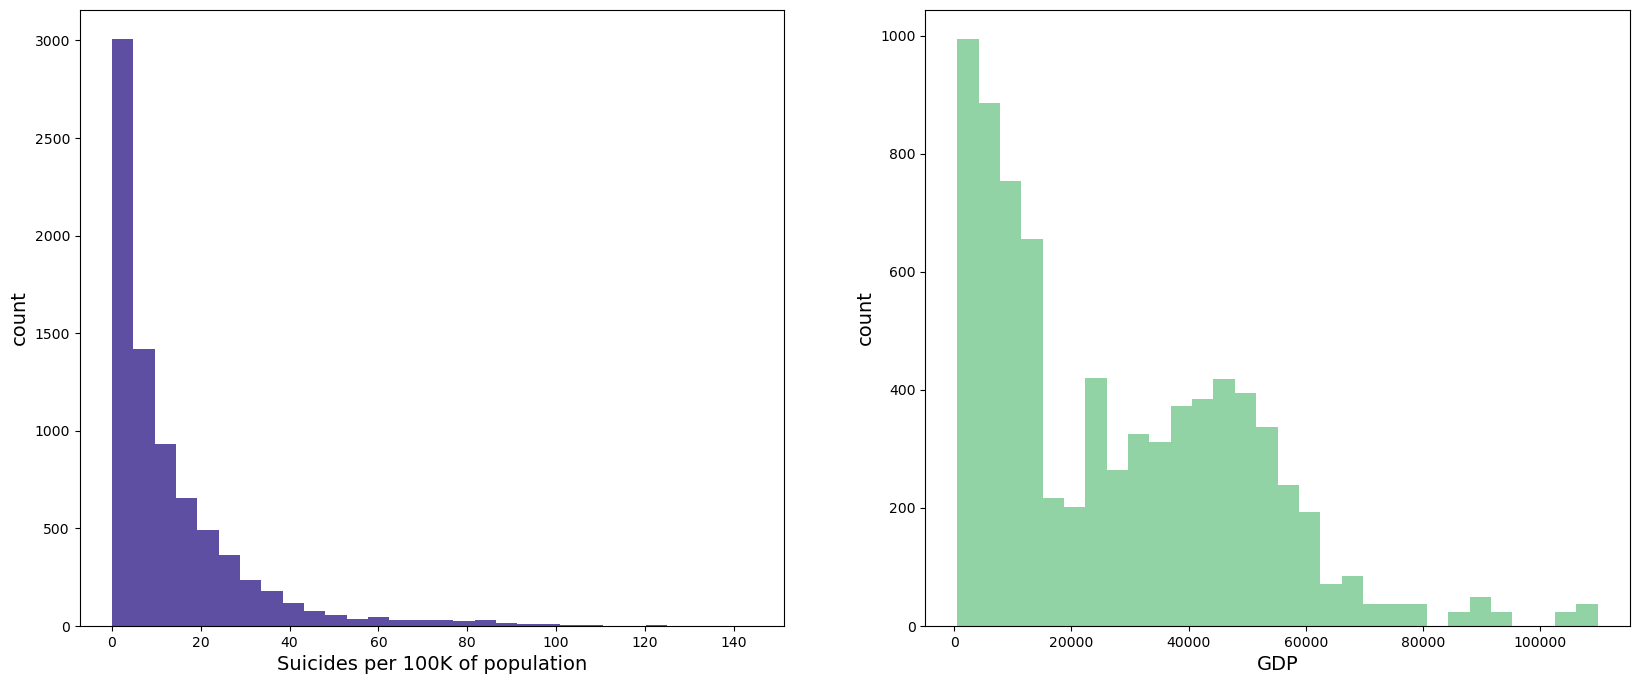

In [19]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(df.suicidesper100k, bins=30, color=col[18])
plt.xlabel('Suicides per 100K of population', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.subplot(122)
plt.hist(df.GDPpcapita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)
plt.ylabel('count', fontsize=14)

#### Insights:

    * There is a high suicide rate for low GDP countries and mid GDP countries.

## Feature Selection

From the WDI dataset, we will be exploring on these 11 features:'country', 'year','GDPpyear','GDPpcapita','employeecompensation','Unemployment', 'Lifeexpectancy','Refugees','Selfemployed','Internetusers','population'.

In [20]:
features = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
            'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers']

## New dataframe total with the above features.
total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()
total

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_12972\1689348345.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()


,GDPpyear,GDPpcapita,employeecompensation,Unemployment,Lifeexpectancy,Refugees,Selfemployed,Internetusers
year,,,,,,,,
2000,2.842040e+11,8462.0,14.694699,15.000,73.576,609.0,1.154,7.038683
2001,2.686970e+11,7900.0,14.238719,17.320,73.755,659.0,1.092,9.780807
2002,9.772400e+10,2840.0,11.344743,19.590,73.932,771.0,1.114,10.882124
2003,1.275870e+11,3668.0,11.670367,15.360,74.107,784.0,1.657,11.913697
2004,1.646580e+11,4683.0,11.506018,13.522,74.280,796.0,1.308,16.036684
2005,1.987370e+11,5590.0,NaN,11.506,74.451,856.0,1.026,17.720583
2006,2.325570e+11,6475.0,NaN,10.077,74.620,894.0,0.991,20.927202
2007,2.875310e+11,7918.0,NaN,8.470,74.787,1171.0,0.944,25.946633
2008,3.615580e+11,9843.0,NaN,7.837,74.952,1047.0,0.719,28.112623


Add a new column to total "suicides" as the total value of Suicides per 100k of population per country per year, calculated by summing over both sexes and age groups.

In [21]:
import warnings
# Calculate the total suicides and population for the first country in the list
total['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()

warnings.filterwarnings("ignore")
# Set the current country for the total dataframe
total['country'] = countrynames[0]

# Loop through the remaining countries in the list
for i, x in enumerate(countrynames[1:]):
    # Calculate mean values for other features and sum of suicides for the current country and year
    suicides = df[features].groupby('country').get_group(x).groupby('year').mean()
    suicides['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(x).groupby('year').sum()
    total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(x).groupby('year').sum()
  
    # Set the current country for the 'suicides' dataframe
    suicides['country'] = x
    
    # Append the calculated values for the current country to the 'total' dataframe
    total = total.append(suicides)

# Reset the index of the 'total' dataframe
total.reset_index(inplace=True)

# Sort the 'total' dataframe (exact sorting order not shown in the code snippet)
sort = True  # This variable likely influences the sorting behavior elsewhere in your code


C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_12972\2904388644.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_12972\2904388644.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()


In [22]:
total

,GDPpyear,GDPpcapita,employeecompensation,Unemployment,Lifeexpectancy,Refugees,Selfemployed,Internetusers,Suicides,population
year,,,,,,,,,,
2000,2.842040e+11,8462.0,14.694699,15.000,73.576,609.0,1.154,7.038683,131.39,33585533
2001,2.686970e+11,7900.0,14.238719,17.320,73.755,659.0,1.092,9.780807,143.56,34010946
2002,9.772400e+10,2840.0,11.344743,19.590,73.932,771.0,1.114,10.882124,139.42,34407507
2003,1.275870e+11,3668.0,11.670367,15.360,74.107,784.0,1.657,11.913697,146.29,34785907
2004,1.646580e+11,4683.0,11.506018,13.522,74.280,796.0,1.308,16.036684,131.06,35162945
2005,1.987370e+11,5590.0,NaN,11.506,74.451,856.0,1.026,17.720583,128.18,35550617
2006,2.325570e+11,6475.0,NaN,10.077,74.620,894.0,0.991,20.927202,128.22,35918886
2007,2.875310e+11,7918.0,NaN,8.470,74.787,1171.0,0.944,25.946633,118.35,36315492
2008,3.615580e+11,9843.0,NaN,7.837,74.952,1047.0,0.719,28.112623,118.11,36733520


In [22]:
totalfeatures = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
                 'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers', 'population']

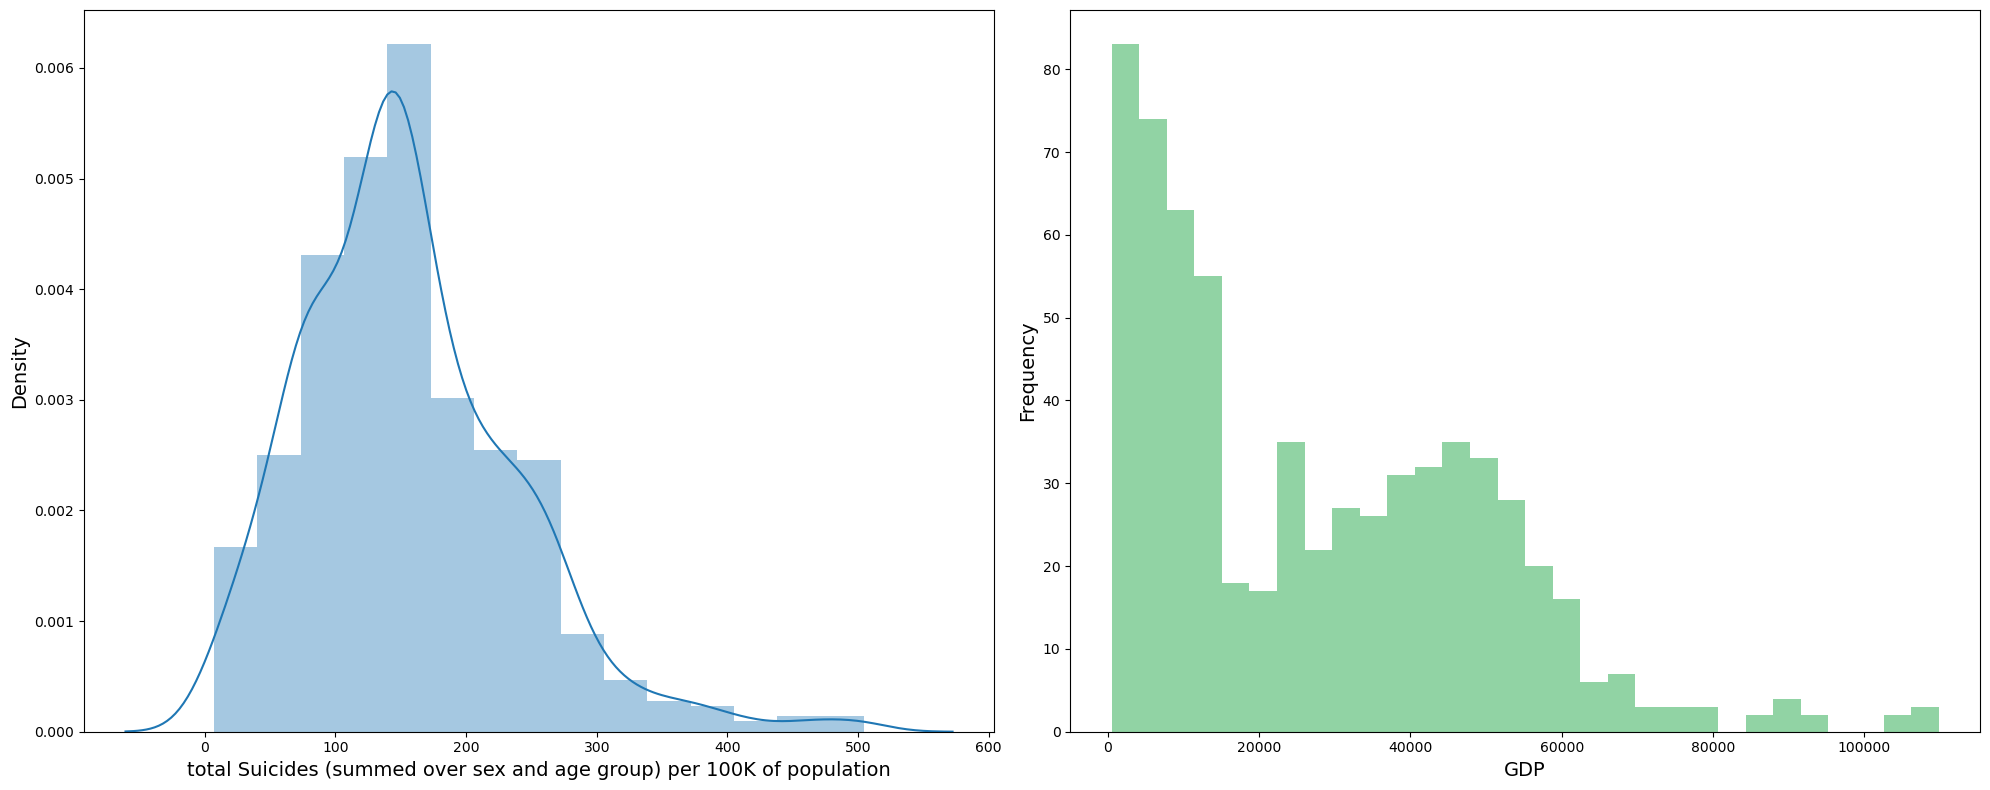

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(20, 8))

warnings.filterwarnings("ignore")

# Subplot 1
plt.subplot(121)  # Subplot index 1 (1 row, 2 columns, subplot 1)
sns.distplot(total.Suicides, bins=15)  # Create a distribution plot for the 'Suicides' column
plt.xlabel('total Suicides (summed over sex and age group) per 100K of population', fontsize=14)  # Set x-axis label
plt.ylabel('Density', fontsize=14)  # Set y-axis label

# Subplot 2
plt.subplot(122)  # Subplot index 2 (1 row, 2 columns, subplot 2)
plt.hist(total.GDPpcapita, bins=30, color=col[7])  # Create a histogram plot for the 'GDPpcapita' column
plt.xlabel('GDP', fontsize=14)  # Set x-axis label
plt.ylabel('Frequency', fontsize=14)  # Set y-axis label

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots for better appearance
plt.show()


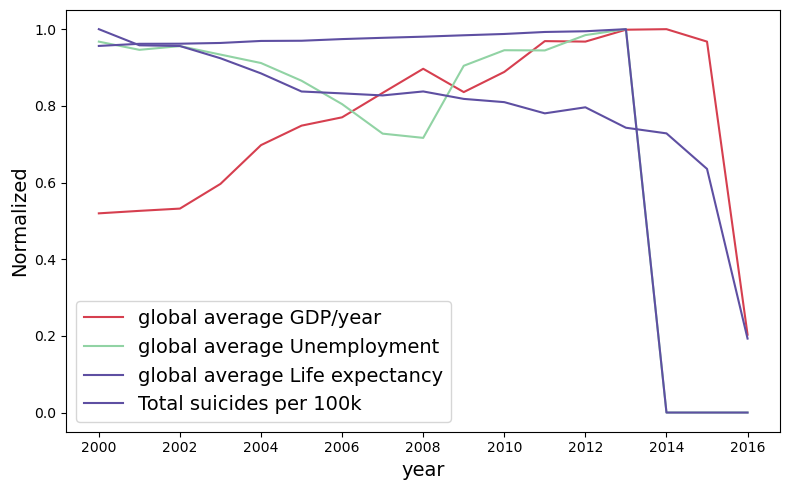

In [24]:
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(8, 5))

warnings.filterwarnings("ignore")

# Calculate mean values for the selected columns and sum of suicides for each year
suicides = df[['year', 'GDPpyear', 'Selfemployed', 'Unemployment', 'Lifeexpectancy']].groupby('year').mean()
suicides['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('year').sum()

# Plot normalized values over time
plt.plot(suicides.index, suicides.GDPpyear/suicides.GDPpyear.max(), color=col[1])  # Plot normalized GDPpyear
plt.plot(suicides.index, suicides.Unemployment/suicides.Unemployment.max(), color=col[7])  # Plot normalized Unemployment
plt.plot(suicides.index, suicides.Lifeexpectancy/suicides.Lifeexpectancy.max(), color=col[15])  # Plot normalized Lifeexpectancy
plt.plot(suicides.index, suicides.Suicides/suicides.Suicides.max(), color=col[17])  # Plot normalized Suicides
plt.legend(['global average GDP/year', 'global average Unemployment', 'global average Life expectancy', 'Total suicides per 100k'], fontsize=14, loc='best')  # Add legend
plt.ylabel('Normalized', fontsize=14)  # Set y-axis label
plt.xlabel('year', fontsize=14)  # Set x-axis label

# Display the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


#### Insights:
    * The Total suicides per 100k is inversely proportional to the global GDP/year.
    * There is no direct correlation between Unemployment rate and suicide rate.

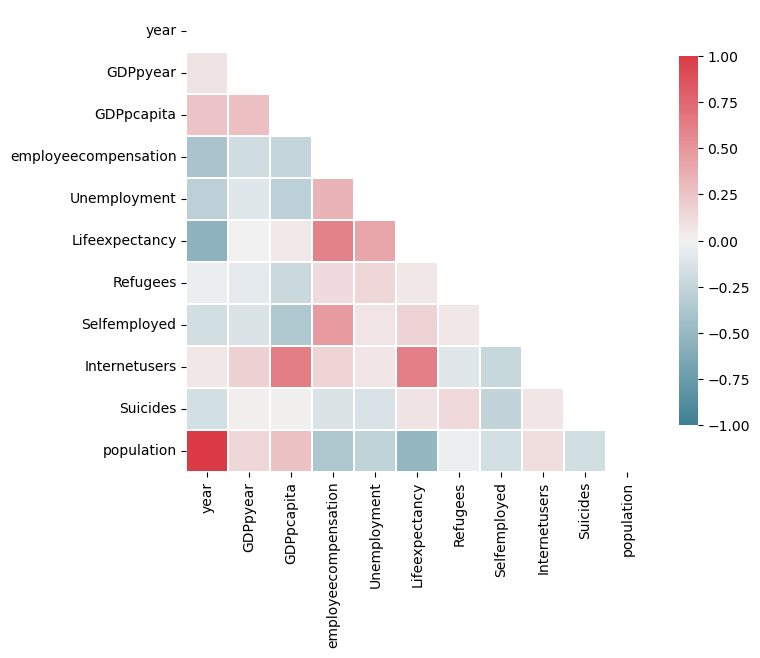

In [25]:
corr = total.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

warnings.filterwarnings("ignore")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});

#### Insights:
    * The following columns are negatively correlated with `Suicides`: year, selfemployed
    * The  following columns are positively correlated with `suicides`: Refugees, Lifeexpectancy

In [26]:
# Replace null values in the 'Internetusers' column with the minimum non-null value
total.Internetusers.fillna(total.Internetusers.min(), inplace=True)

# Replace null values in the 'Refugees' column with the value 8
total.Refugees.fillna(8, inplace=True)

# Replace null values in the 'employeecompensation' column with the mean value of the column
total.employeecompensation.fillna(total.employeecompensation.mean(), inplace=True)

# Replace null values in the 'population' column with the mean value of the column
total.population.fillna(total.population.mean(), inplace=True)


In [27]:
# Create a new column 'risk' in the 'total' DataFrame, initially copying the values from the 'Suicides' column
total['risk'] = total.Suicides.copy()

# Use NumPy's 'np.where' to classify the risk based on the condition
# If the value in 'risk' column is less than the mean of 'Suicides' column, set 'risk' to 0, otherwise set it to 1
total['risk'] = np.where(total.risk < total.Suicides.mean(), 0, 1)

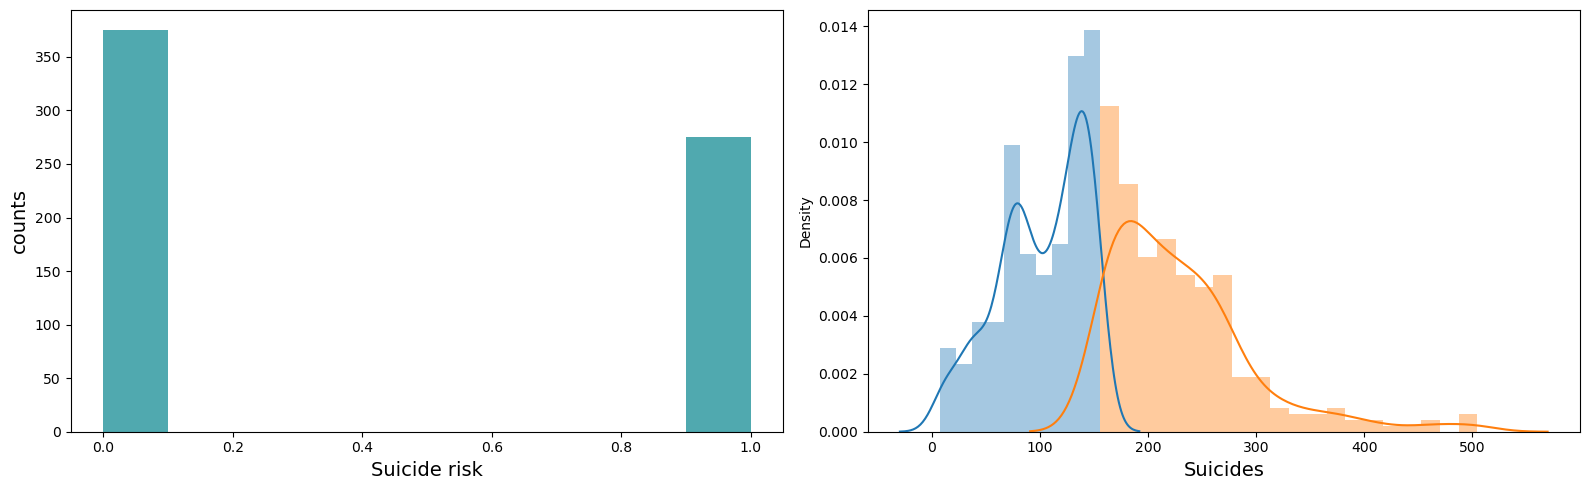

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(16, 5))

warnings.filterwarnings("ignore")
# Subplot 1: Histogram of 'risk' column
plt.subplot(121)  # Subplot index 1 (1 row, 2 columns, subplot 1)
plt.hist(total.risk, color=col[8])  # Create a histogram of the 'risk' column
plt.ylabel('counts', fontsize=14)  # Set y-axis label
plt.xlabel('Suicide risk', fontsize=14)  # Set x-axis label

# Subplot 2: Distribution plots of 'Suicides' based on 'risk'
plt.subplot(122)  # Subplot index 2 (1 row, 2 columns, subplot 2)
sns.distplot(total.Suicides[total.risk == 0], bins=10)  # Distribution plot for 'Suicides' when 'risk' is 0
sns.distplot(total.Suicides[total.risk == 1], bins=20)  # Distribution plot for 'Suicides' when 'risk' is 1
plt.xlabel('Suicides', fontsize=14)  # Set x-axis label

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots for better appearance
plt.show()


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Use the LabelEncoder to transform and encode the 'country' column
total.country = le.fit_transform(total.country)

# Display the unique numeric labels assigned to countries
unique_labels = total.country.unique()
print(unique_labels)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [34]:
total.shape

(650, 13)

In [30]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparing data for modeling

X = np.asarray(total[totalfeatures])
y = np.asarray(total['risk'])


# Applying standard scaler on data, since ML algorithms work with the assumption that the data is normally distributed

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [31]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (487, 11) (487,)
Test set: (163, 11) (163,)


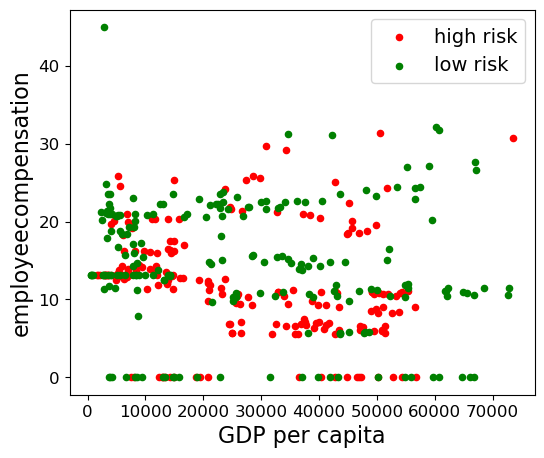

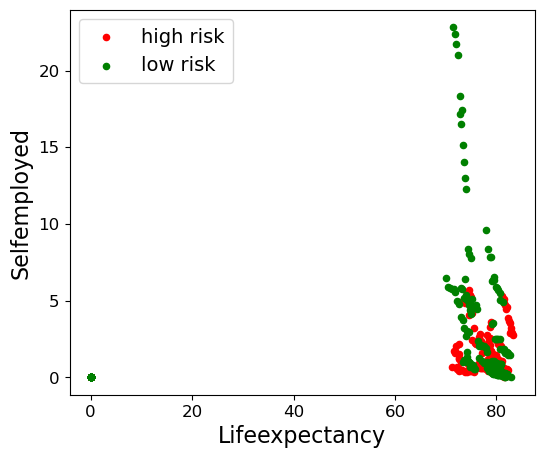

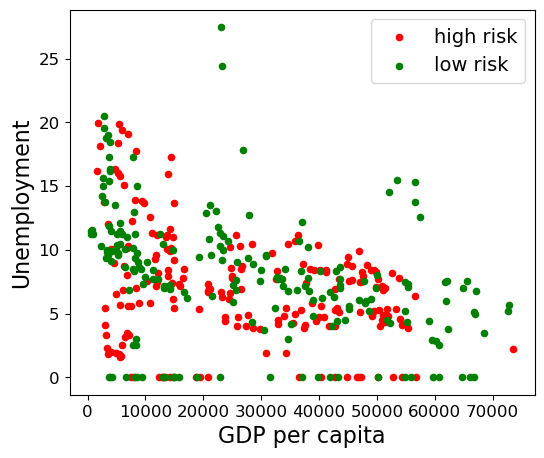

In [32]:
# Scatter plot for 'GDPpcapita' vs 'employeecompensation'
ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='GDPpcapita', y='employeecompensation', color='red',
                                            label='high risk', figsize=(6, 5), fontsize=12)
total[total['risk'] == 0][0:200].plot(kind='scatter', x='GDPpcapita', y='employeecompensation', color='green',
                                      label='low risk', ax=ax1)

plt.ylabel('employeecompensation', fontsize=16)
plt.xlabel('GDP per capita', fontsize=16)
plt.legend(fontsize=14)

# Scatter plot for 'Lifeexpectancy' vs 'Selfemployed'
ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='Lifeexpectancy', y='Selfemployed', color='red',
                                            label='high risk', figsize=(6, 5), fontsize=12)
total[total['risk'] == 0][0:200].plot(kind='scatter', x='Lifeexpectancy', y='Selfemployed', color='green',
                                      label='low risk', ax=ax1)

plt.ylabel('Selfemployed', fontsize=16)
plt.xlabel('Lifeexpectancy', fontsize=16)
plt.legend(fontsize=14)

# Scatter plot for 'GDPpcapita' vs 'Unemployment'
ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='GDPpcapita', y='Unemployment', color='red',
                                            label='high risk', figsize=(6, 5), fontsize=12)
total[total['risk'] == 0][0:200].plot(kind='scatter', x='GDPpcapita', y='Unemployment', color='green',
                                     label='low risk', ax=ax1)

plt.ylabel('Unemployment', fontsize=16)
plt.xlabel('GDP per capita', fontsize=16)
plt.legend(fontsize=14)

warnings.filterwarnings("ignore")

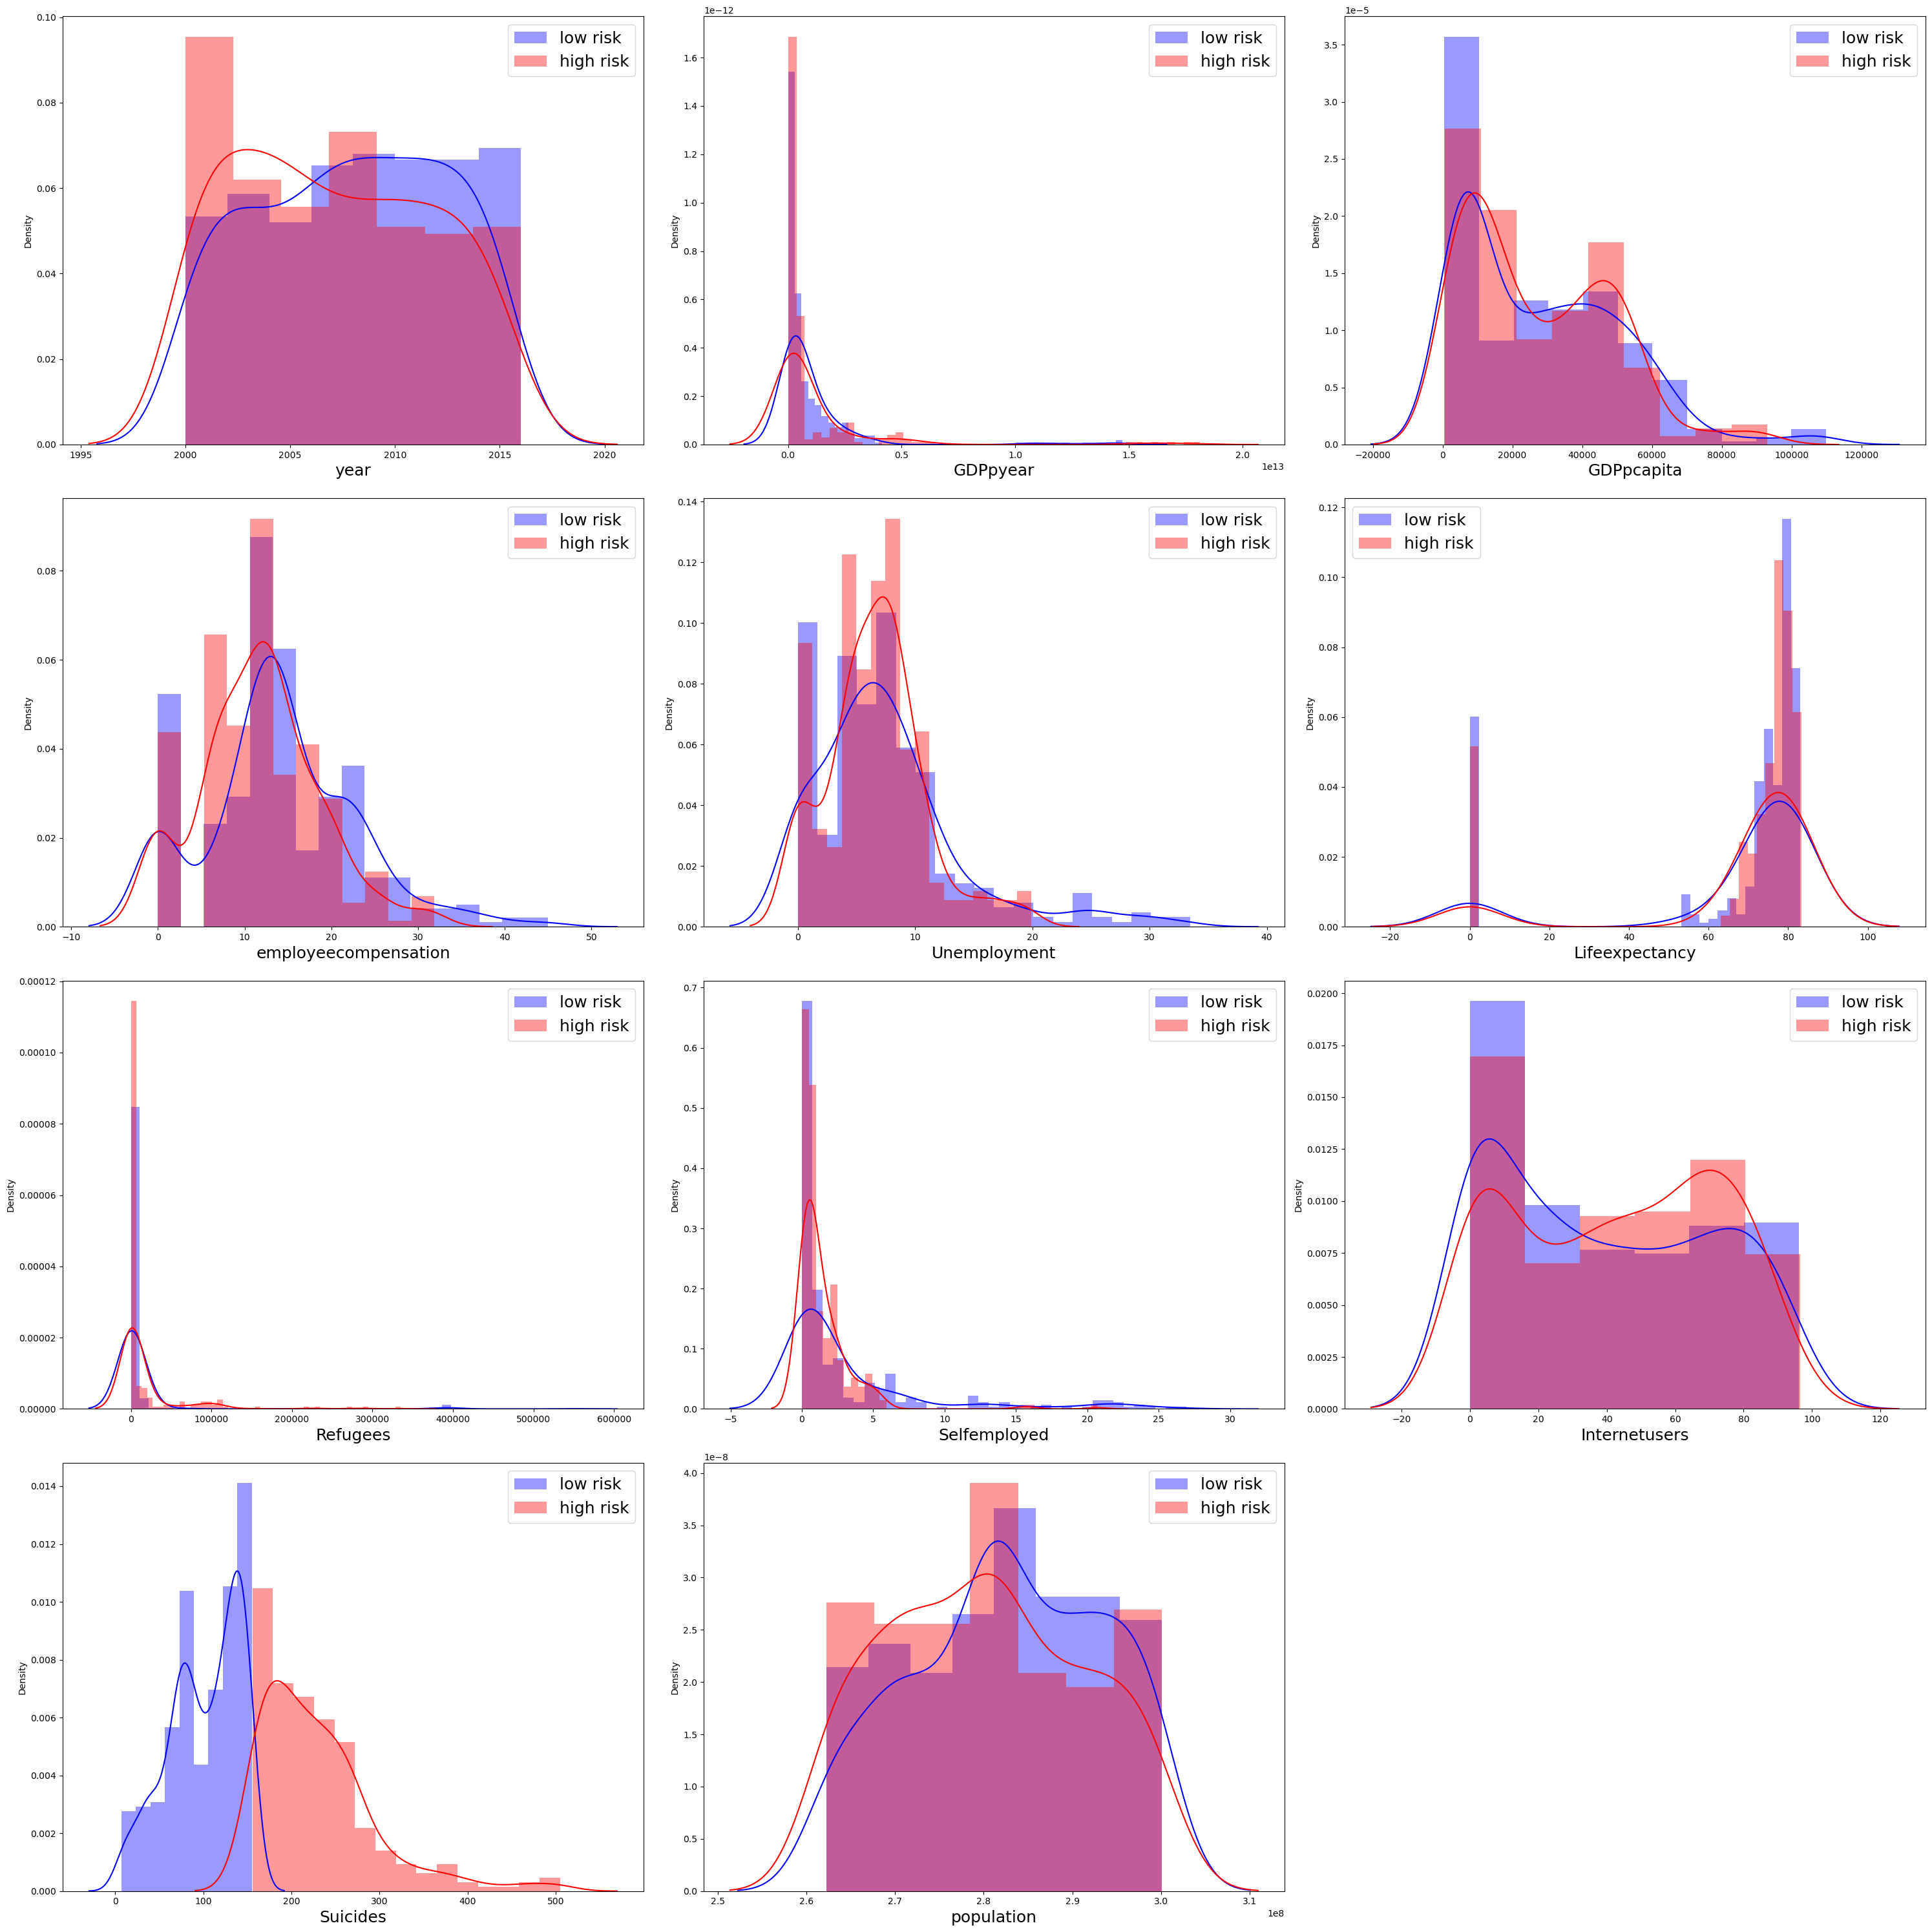

In [33]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore")

# Create a large figure
fig = plt.figure(figsize=(30, 30))

j = 0
for i, x in enumerate(total.columns[0:11]):
    plt.subplot(4, 3, j+1)
    j += 1
    sns.distplot(total[x][total.risk == 0], color='blue', label='low risk')
    sns.distplot(total[x][total.risk == 1], color='red', label='high risk')       
    plt.legend(loc='best', fontsize=18)  
    plt.xlabel(x, fontsize=18)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## Modelling

I'm using four different classification methods, optimize each, compare the performance of models and extract the feature importance for each model. Based on the EDA results, I expect nonlinear classification to perform better on this data.

##### I will try out the following models:
    1. Support Vector Machines (SVMs) with Kernels
    2. Random Forest
    3. Gradient Boosting
    4. k-Nearest Neighbors (k-NN)
    5. XGBoost
    6. Naive Bayes
    7. Decision Trees

In [34]:
# For Support Vector Machines (SVMs)
from sklearn.svm import SVC

# For Random Forest
from sklearn.ensemble import RandomForestClassifier

# For Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# For k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier

# For XGBoost
import xgboost as xgb

# For Naive Bayes
from sklearn.naive_bayes import GaussianNB

# For Decision Trees
from sklearn.tree import DecisionTreeClassifier


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
classification_models = {
    "Support vector machine":SVC(kernel='linear', C=1.0),  
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100),  
    "Gradient Boosting":GradientBoostingClassifier(n_estimators=100),   
    "KNN":KNeighborsClassifier(n_neighbors=5),  
    "XGboost":xgb.XGBClassifier(n_estimators=100), 
    "Naive Bayes":GaussianNB(),
    "Decision Tree Classifier":DecisionTreeClassifier()
}

In [37]:
np.random.seed(42)

# Import necessary libraries
from sklearn.metrics import accuracy_score

# Initialize a list to store accuracy scores
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for model_name, model in classification_models.items():
    if model_name == 'Neural Network':
        model.compile(optimizer='adam', loss='binary_crossentropy')  # Compile the neural network model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracy_scores[model_name] = accuracy
    precision_scores[model_name] = precision
    recall_scores[model_name] = r_score
    f1_scores [model_name] = f1

# Display the accuracy scores for each model
for model_name in classification_models.keys():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_scores[model_name]:.4f}")
    print(f"Precision: {precision_scores[model_name]:.4f}")
    print(f"Recall: {recall_scores[model_name]:.4f}")
    print(f"F1-Score: {f1_scores[model_name]:.4f}")
    print("=" * 30)

Model: Support vector machine
Accuracy: 0.6687
Precision: 0.6269
Recall: 0.5915
F1-Score: 0.6087
Model: Random Forest Classifier
Accuracy: 0.9325
Precision: 0.9167
Recall: 0.9296
F1-Score: 0.9231
Model: Gradient Boosting
Accuracy: 0.9202
Precision: 0.9143
Recall: 0.9014
F1-Score: 0.9078
Model: KNN
Accuracy: 0.8528
Precision: 0.7975
Recall: 0.8873
F1-Score: 0.8400
Model: XGboost
Accuracy: 0.9202
Precision: 0.8919
Recall: 0.9296
F1-Score: 0.9103
Model: Naive Bayes
Accuracy: 0.5583
Precision: 0.4955
Recall: 0.7746
F1-Score: 0.6044
Model: Decision Tree Classifier
Accuracy: 0.8957
Precision: 0.8553
Recall: 0.9155
F1-Score: 0.8844


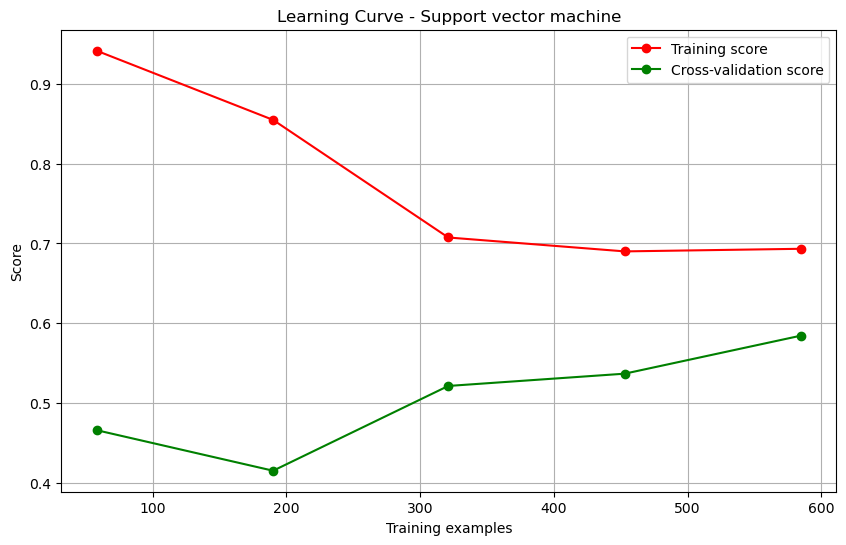

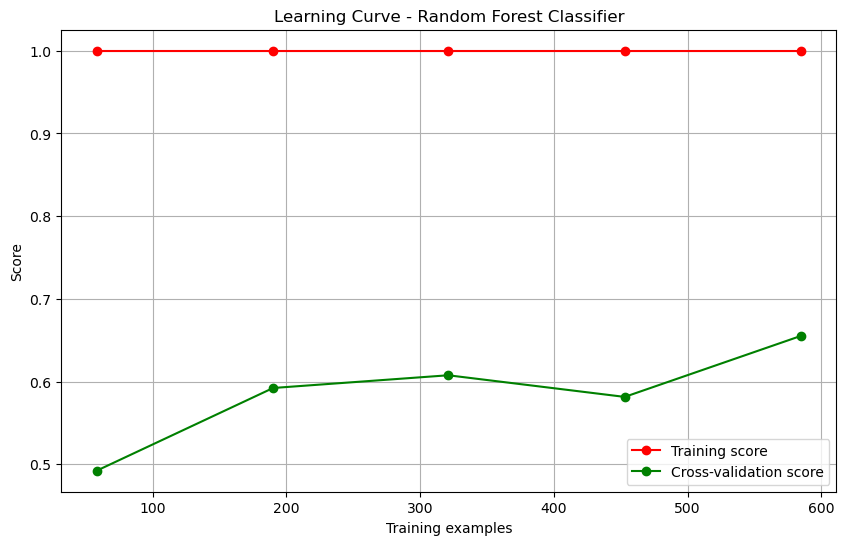

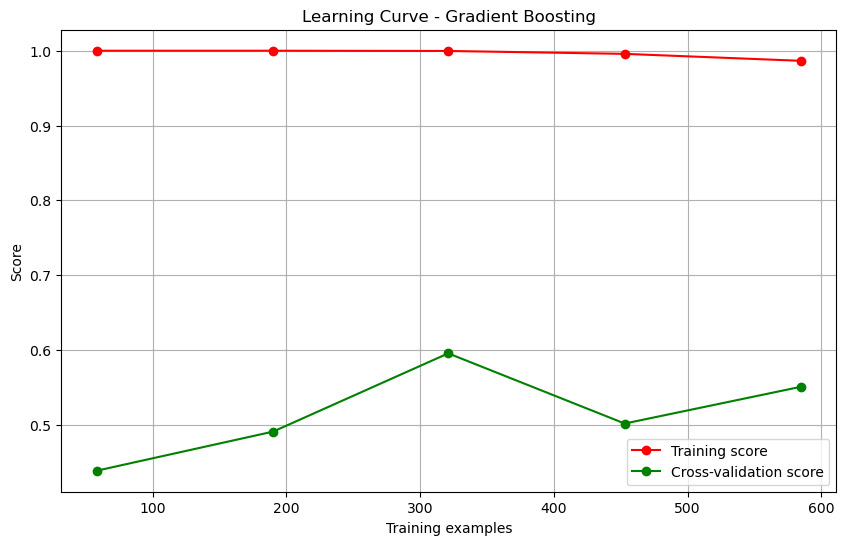

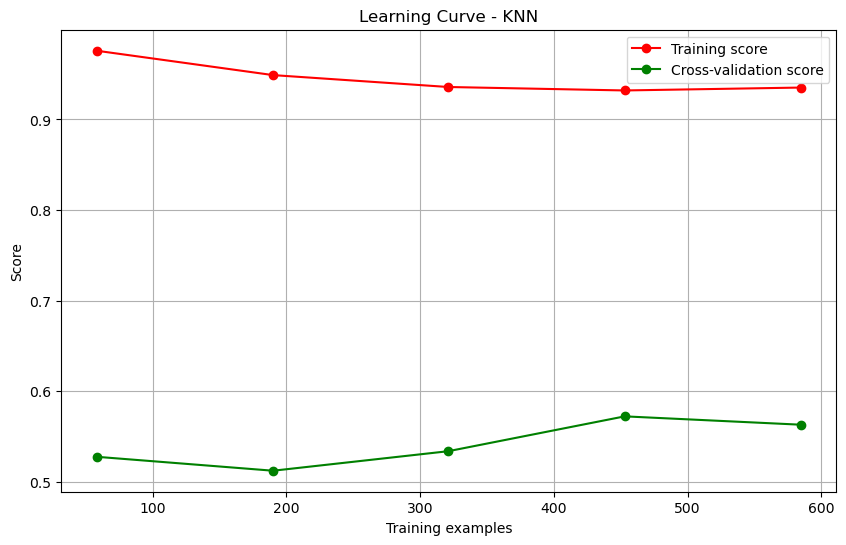

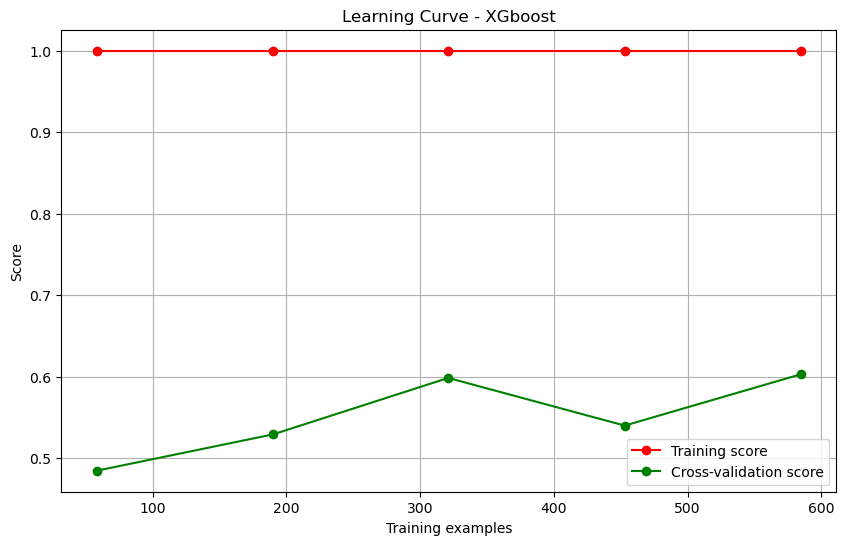

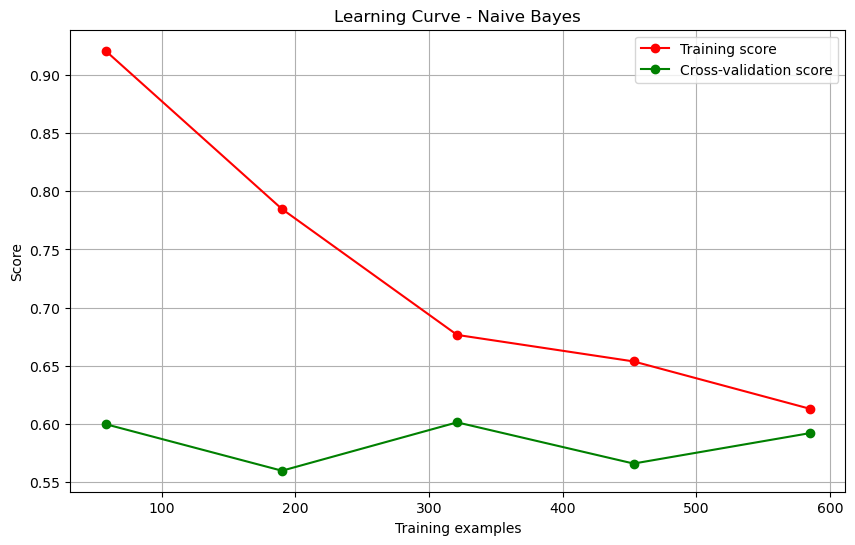

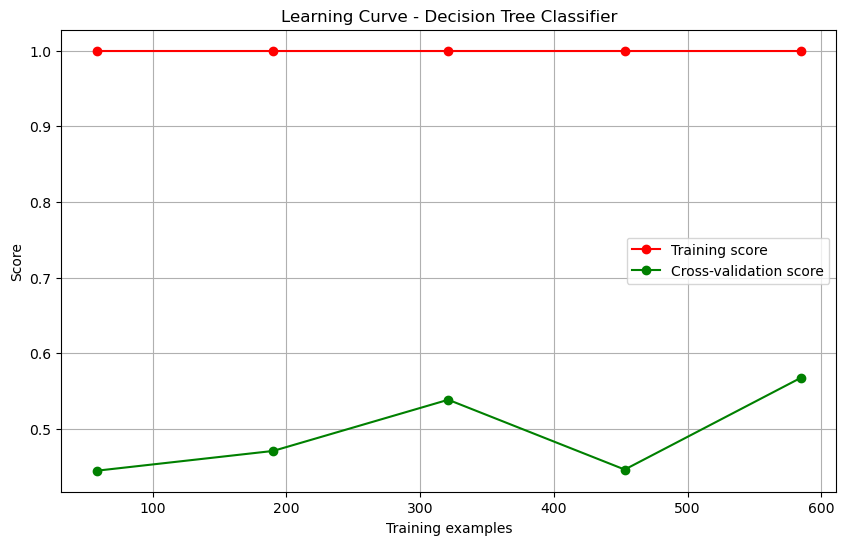

In [55]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, title, X, y, cv, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Define the cross-validation strategy (e.g., 5-fold cross-validation)
cv = 10

# Loop over each model to create learning curves
for model_name, model in classification_models.items():
    plot_learning_curve(model, f"Learning Curve - {model_name}", X_scaled, y, cv=cv)
    plt.show()

## Hyperparameter Tuning

In [38]:
np.random.seed(42)

from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Support vector machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest Classifier': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'XGboost': {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]},
    'Decision Tree Classifier': {'max_depth': [None, 10, 20], 'max_leaf_nodes':[None, 10, 40]}
}

# Perform hyperparameter tuning for each model
for model_name, model in classification_models.items():
    if model_name != 'Naive Bayes':
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        print(f"Model: {model_name}")
        print("Best Parameters:", grid_search.best_params_)
        print("Best Accuracy:", grid_search.best_score_)
        print("=" * 30)


Model: Support vector machine
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Accuracy: 0.8275825794235221
Model: Random Forest Classifier
Best Parameters: {'max_depth': None, 'n_estimators': 150}
Best Accuracy: 0.9033662949715969
Model: Gradient Boosting
Best Parameters: {'max_depth': 5, 'n_estimators': 150}
Best Accuracy: 0.8972228066484327
Model: KNN
Best Parameters: {'n_neighbors': 3}
Best Accuracy: 0.796675783715548
Model: XGboost
Best Parameters: {'max_depth': 4, 'n_estimators': 100}
Best Accuracy: 0.8972017673048601
Model: Decision Tree Classifier
Best Parameters: {'max_depth': None, 'max_leaf_nodes': None}
Best Accuracy: 0.8602566799915843


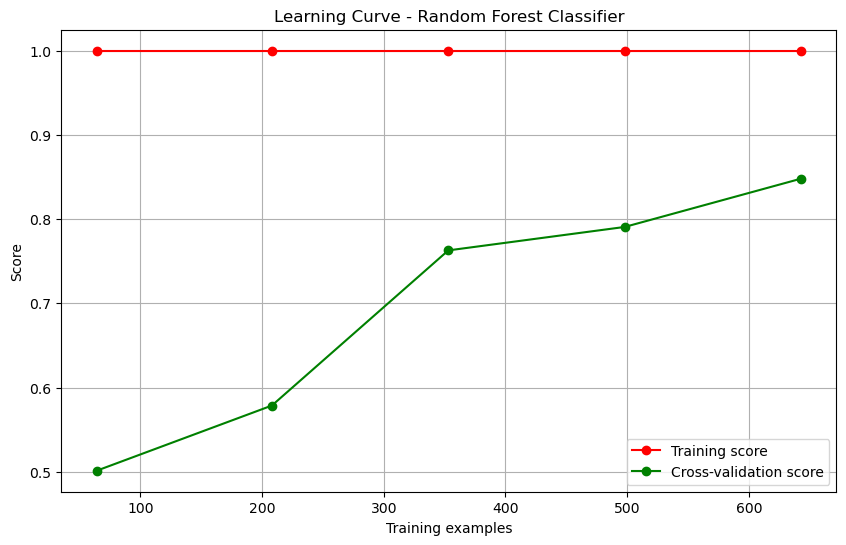

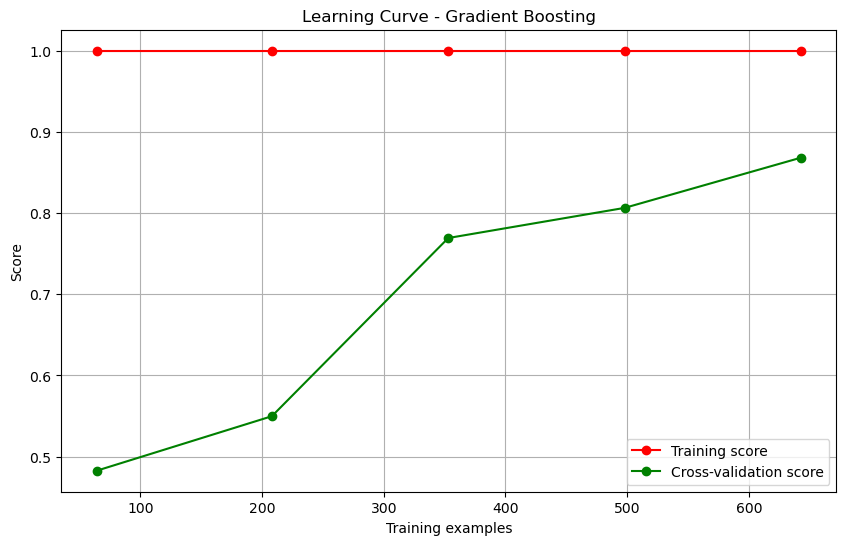

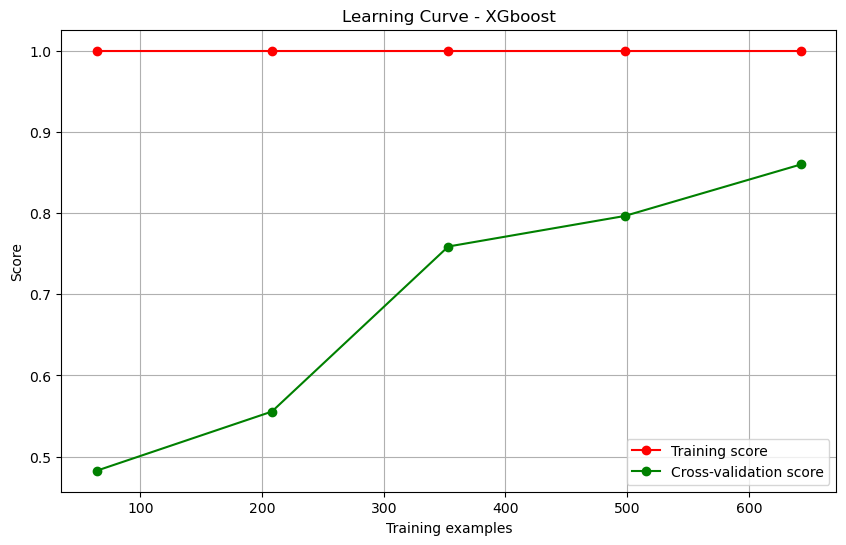

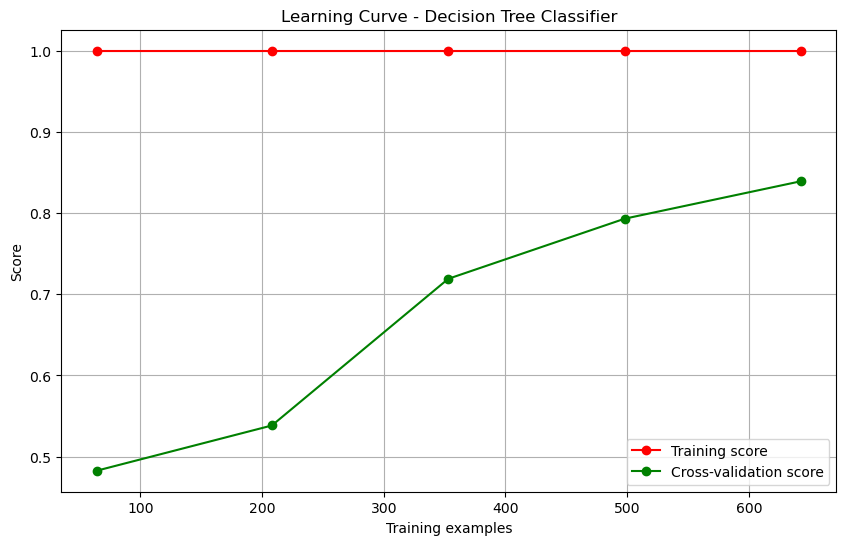

In [59]:
## Learning curve:  learning curves involves understanding how the training and validation scores change as the size of the training dataset increases

classification_models = {
    "Random Forest Classifier":RandomForestClassifier(n_estimators=150, max_depth=20),  
    "Gradient Boosting":GradientBoostingClassifier(n_estimators=150, max_depth=5),   
    "XGboost":xgb.XGBClassifier(n_estimators=100, max_depth=4), 
    "Decision Tree Classifier":DecisionTreeClassifier(max_depth=20)
}

from sklearn.model_selection import learning_curve

def plot_learning_curve(model, title, X, y, cv, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Define the cross-validation strategy (e.g., 5-fold cross-validation)
cv = 100

# Loop over each model to create learning curves
for model_name, model in classification_models.items():
    plot_learning_curve(model, f"Learning Curve - {model_name}", X_scaled, y, cv=cv)
    plt.show()

## Feature Importance

In [39]:
np.random.seed(42)

# Initialize Random Forest, XGBoost, and Gradient Boosting models
rf_model = RandomForestClassifier(n_estimators=150, max_depth=20)
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=4)
gb_model = GradientBoostingClassifier(n_estimators=150, max_depth=5)
dt_model = DecisionTreeClassifier(max_depth=20)

# Fit the models to the training data
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Get feature importances from each model
rf_feature_importances = rf_model.feature_importances_
xgb_feature_importances = xgb_model.feature_importances_
gb_feature_importances = gb_model.feature_importances_
dt_feature_importances = dt_model.feature_importances_

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({
    'Feature': total.columns[0:11],
    'Random Forest Classifier': rf_feature_importances,
    'XGBoost': xgb_feature_importances,
    'Gradient Boosting': gb_feature_importances,
    'Decision Tree Classifier':dt_feature_importances
})

# Print the feature importance DataFrame
print(feature_importance_df)


                 Feature  Random Forest Classifier   XGBoost  \
0                   year                  0.159206  0.136522   
1               GDPpyear                  0.026835  0.034760   
2             GDPpcapita                  0.137211  0.068999   
3   employeecompensation                  0.090626  0.050958   
4           Unemployment                  0.104011  0.144275   
5         Lifeexpectancy                  0.054151  0.019277   
6               Refugees                  0.067291  0.052755   
7           Selfemployed                  0.142939  0.212239   
8          Internetusers                  0.146995  0.201865   
9               Suicides                  0.043367  0.044085   
10            population                  0.027369  0.034265   

    Gradient Boosting  Decision Tree Classifier  
0            0.200944                  0.176026  
1            0.009199                  0.019265  
2            0.112477                  0.078638  
3            0.070677          

## Classification Performance Comparision/ROC curve

    Analysis of which model has performed better than others.

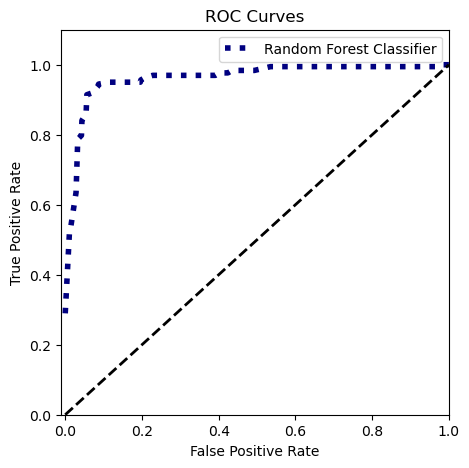

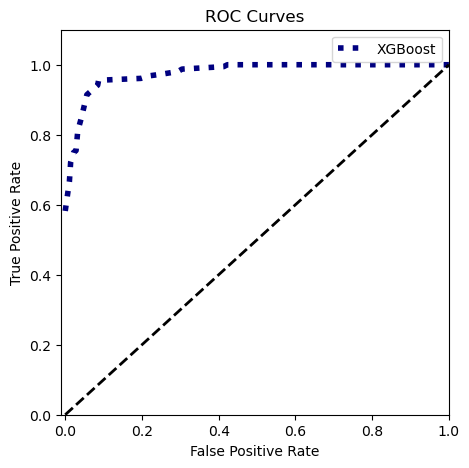

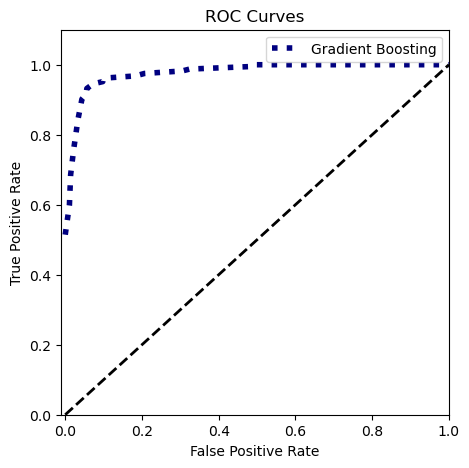

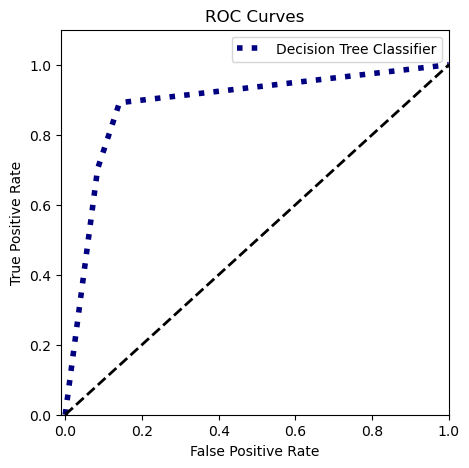

In [40]:
models = [rf_model, xgb_model, gb_model, dt_model]
modelnames = ['Random Forest Classifier', 'XGBoost', 'Gradient Boosting', 'Decision Tree Classifier']


for i, x in enumerate(models):
    
    y_true = y_test
    y_probas = x.predict_proba(X_test)
    ax1 = skplt.metrics.plot_roc(y_true, y_probas, plot_micro=False, plot_macro=True, classes_to_plot=[], figsize=(5, 5))
    plt.axis((-0.01, 1, 0, 1.1))
    plt.legend([modelnames[i]], loc='best')

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
rfscores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

rfpredictions = cross_val_predict(rf_model, X_train, y_train)

print('CM for random forest with cross validation\n', confusion_matrix(y_train, rfpredictions))
print('classification report for random forest with CV \n', classification_report(y_train, rfpredictions))

dtscores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
DTpredictions = cross_val_predict(dt_model, X_train, y_train)

print('CM for Decision tree with cross validation\n', confusion_matrix(y_train, DTpredictions))
print('classification report for Decision tree with CV \n', classification_report(y_train, DTpredictions))

xgbscores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
xgbpredictions = cross_val_predict(xgb_model, X_train, y_train)

print('CM for XGboosting with cross validation\n', confusion_matrix(y_train, xgbpredictions))
print('classification report for XGboosting with CV \n', classification_report(y_train, xgbpredictions))

gbscores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
gbpredictions = cross_val_predict(gb_model, X_train, y_train)

print('CM for Gradient Boosting with cross validation\n', confusion_matrix(y_train, gbpredictions))
print('classification report for Gradient Boosting with CV \n', classification_report(y_train, gbpredictions))

CM for random forest with cross validation
 [[262  21]
 [ 30 174]]
classification report for random forest with CV 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       283
           1       0.89      0.85      0.87       204

    accuracy                           0.90       487
   macro avg       0.89      0.89      0.89       487
weighted avg       0.90      0.90      0.89       487

CM for Decision tree with cross validation
 [[252  31]
 [ 37 167]]
classification report for Decision tree with CV 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       283
           1       0.84      0.82      0.83       204

    accuracy                           0.86       487
   macro avg       0.86      0.85      0.86       487
weighted avg       0.86      0.86      0.86       487

CM for XGboosting with cross validation
 [[259  24]
 [ 26 178]]
classification report for XGboosting with CV 
  

In [47]:
rf_feature_importances

array([0.15920643, 0.02683477, 0.13721082, 0.09062601, 0.10401093,
       0.05415054, 0.06729104, 0.1429386 , 0.14699497, 0.0433667 ,
       0.02736921])

## Feature importance results summary

Feature importance results for the four best models
random forest accuracy score (5-fold cross validation)= 0.8971807279612877 +/- 0.08596909551021302
Decison Tree accuracy score (5-fold cross validation)= 0.8499894803282139 +/- 0.07631176127843492
XGBoosting accuracy score (5-fold cross validation)= 0.8972017673048601 +/- 0.0707205417400881
Gradient Boosting accuracy score (5-fold cross validation)= 0.9013254786450663 +/- 0.06897144809174746


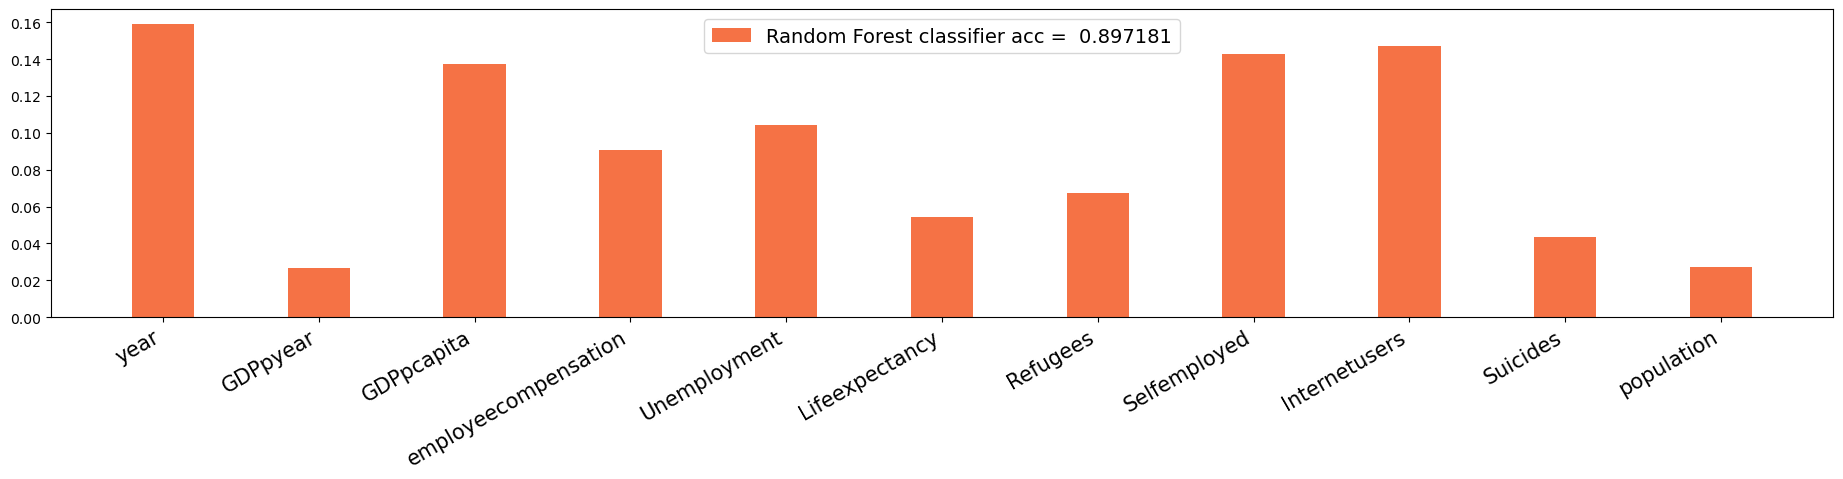

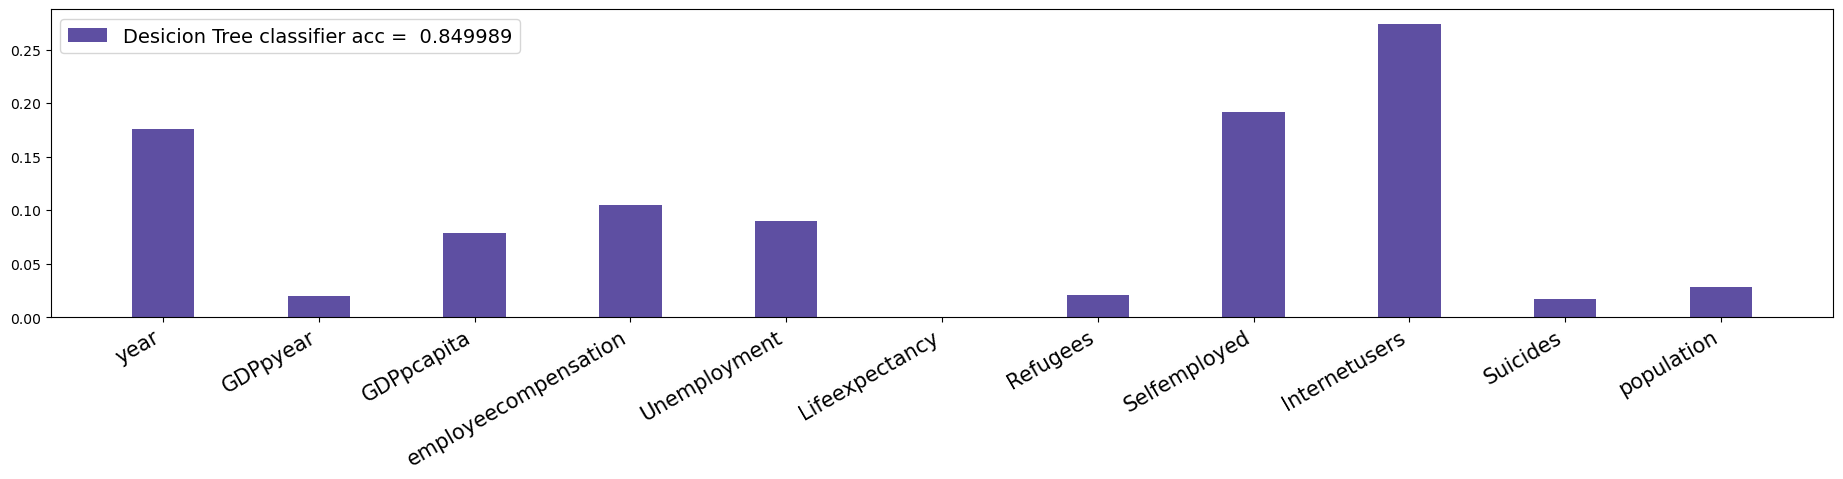

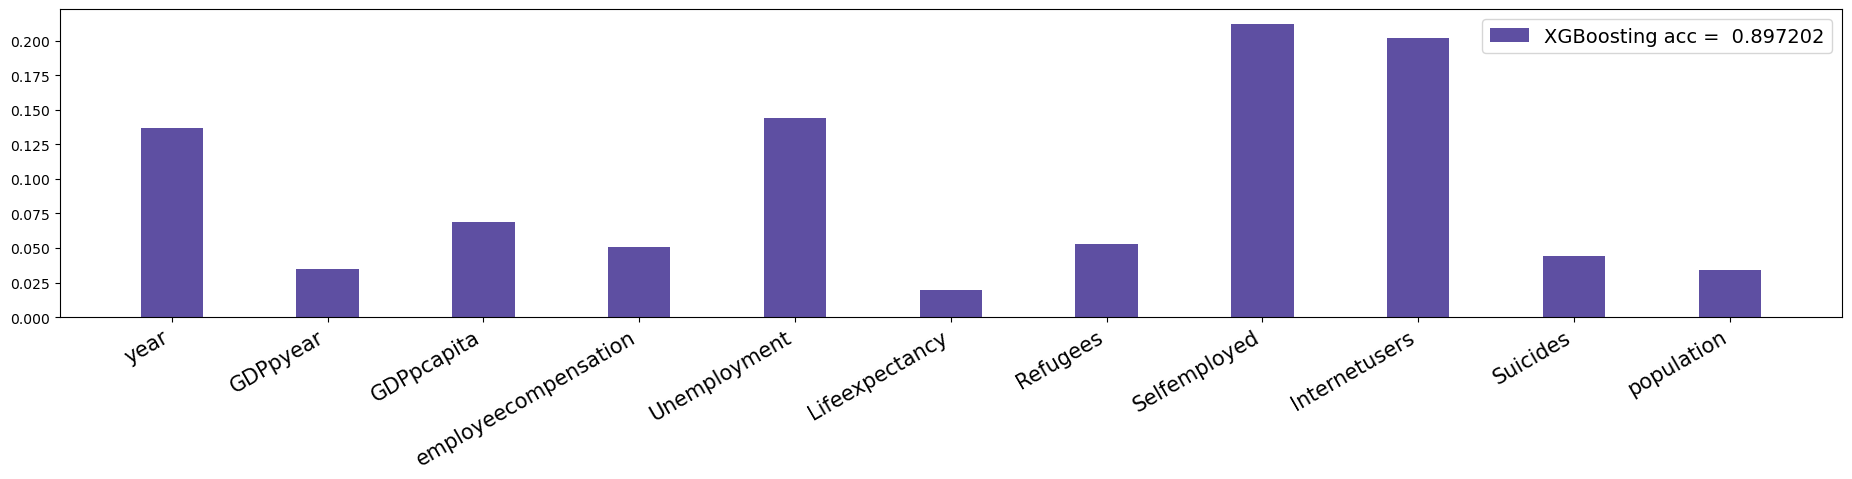

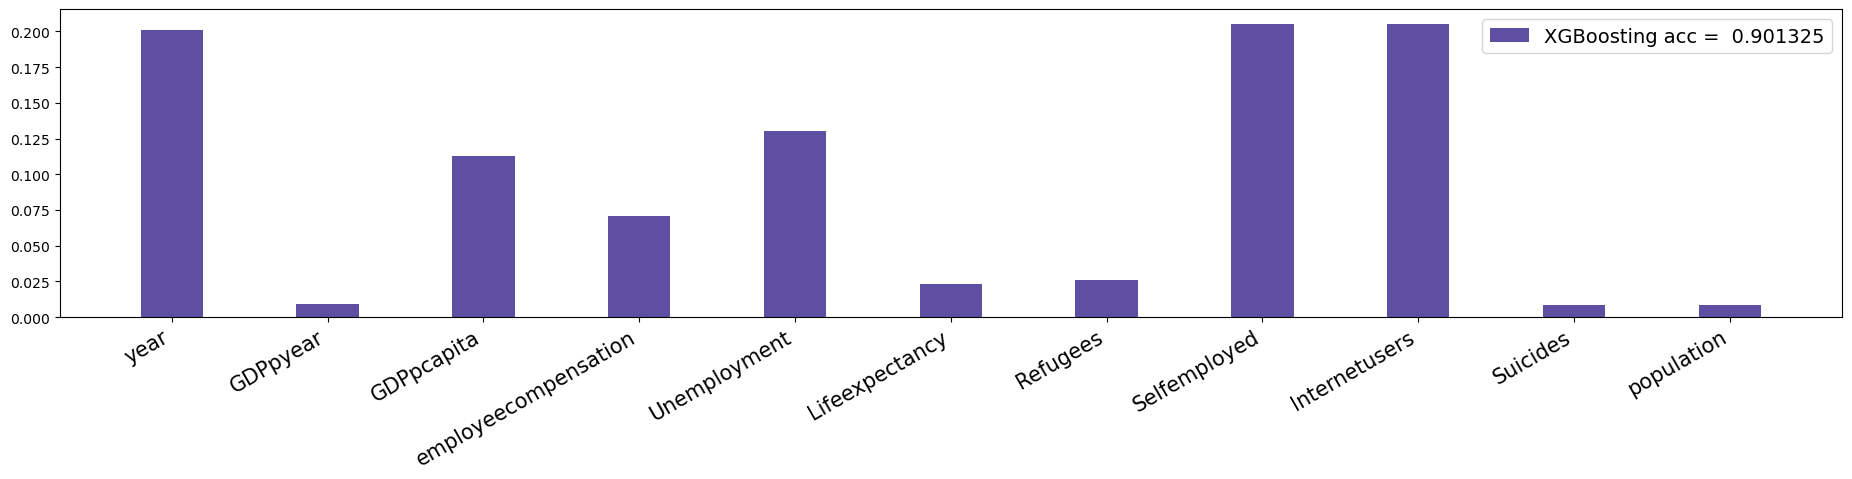

In [42]:
print('Feature importance results for the four best models')
print('random forest accuracy score (5-fold cross validation)=', rfscores.mean(), '+/-', rfscores.std()*2)

plt.figure(figsize=(23, 4))
plt.bar(total.columns[0:11], rf_feature_importances, color=col[2], width=0.4,)
plt.xticks(ha='right', rotation=30, fontsize=15)
plt.legend(['Random Forest classifier acc = % f'% rfscores.mean()], fontsize=14)

print('Decison Tree accuracy score (5-fold cross validation)=', dtscores.mean(), '+/-', dtscores.std()*2)
plt.figure(figsize=(23, 4))
plt.bar(total.columns[0:11], dt_feature_importances, color=col[14], width=0.4)
plt.legend(['Desicion Tree classifier acc = % f'% dtscores.mean()], fontsize=14)
plt.xticks(ha='right', rotation=30, fontsize=15)

print('XGBoosting accuracy score (5-fold cross validation)=', xgbscores.mean(), '+/-', xgbscores.std()*2)
plt.figure(figsize=(23, 4))
plt.bar(total.columns[0:11], xgb_feature_importances, color=col[18], width=0.4)
plt.legend(['XGBoosting acc = % f'% xgbscores.mean()], fontsize=14);
plt.xticks(ha='right', rotation=30, fontsize=15);

print('Gradient Boosting accuracy score (5-fold cross validation)=', gbscores.mean(), '+/-', gbscores.std()*2)
plt.figure(figsize=(23, 4))
plt.bar(total.columns[0:11], gb_feature_importances, color=col[18], width=0.4)
plt.legend(['XGBoosting acc = % f'% gbscores.mean()], fontsize=14);
plt.xticks(ha='right', rotation=30, fontsize=15);

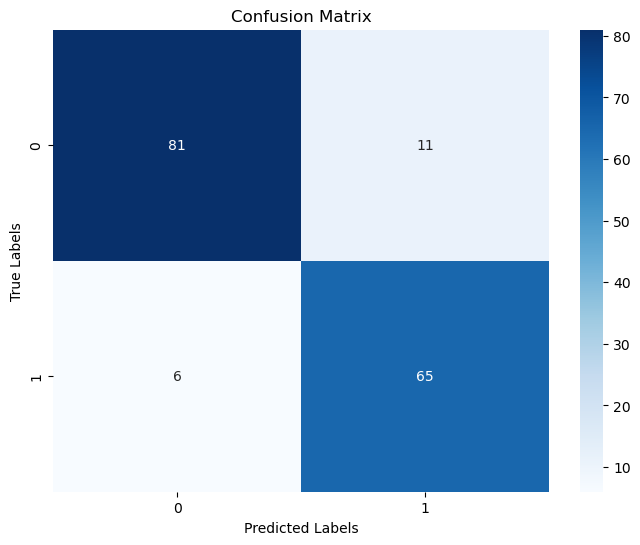

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

With the completion of this project, we have successfully constructed a machine learning model using the Random Forest Classifier, achieving an impressive accuracy of over 90%. Through a comprehensive analysis of various classification algorithms and a thorough evaluation of their performance, we opted for the Random Forest Classifier as our chosen approach. This achievement underscores the effectiveness of our model in accurately predicting outcomes and underscores the value of rigorous data exploration and modeling techniques in addressing complex real-world challenges.